# Task2 Benjamin Seeger
In this file I am working on task 2 of the lecture. Here my model can be developed. More detailed explanations are found in the final report. As my birthday is in February, I have been assigned the following focus:
1. Performance
2. Explainability
3. Data Analysis  
> Accordingly, in the following implementation, efforts will be made primarily to reduce loss and increase accuracy. According to the prioritisation, the other aspects will of course also be considered. The Explainability point is especially implemented through the additional text explaining the code. At the bottom is an archive of models that reflect the development of my network. In each case, the results of the network that influenced the development have been analysed. 

In [ ]:
# Test if the binder works
print("Hello to my task.")

# Implementation
In the following, the task is processed with the MNIST dataset. Individual subheadings that structure the code are intended to provide an overview. Notes on the implementation and justifications for the code are inserted at the appropriate places.
## Import of the MNIST-Dataset
The following lines load the dataset and import other things that are helpful for later analyses, for example.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

Here we can print the first element of the training dataset. This will give us later a reference for the pre-processing process.

In [ ]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

## Pre-processing
By preparing the data, the training process can be accelerated by scaling the data from the greyscale values 0 to 255 to 0 to 1. Later on this operations will end in a loss decreasment an so on a accuracy improvement.

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_validation = tf.keras.utils.normalize(x_validation, axis = 1)

By printing the first element of the training set again you can see how the greyscale valuas were fitted in the range of 0 to 1 in comparishment to the print before.

In [ ]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

Reshaping the data is needed for the input layer.

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)

## Definition of the model architecture
In the following code box my model is defined and compiled. If you want you can get a summary in the last line of the box as well. More detailed information to the development process are found in the last section in the archive. There are some of my models I tried. Som more informations about my final model here are in the final report.

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# If the summary of the network is desired, comment out the following line
#model.summary()

## Train the network
See the following code.

In [8]:
import datetime
import os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(x_train, 
          y_train, 
          epochs=10,
          callbacks=[tensorboard_callback],
          validation_data=(x_validation, y_validation)
)

2022-12-10 09:08:21.842251: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/30
1875/1875 [==============================] - 119s 62ms/step - loss: 0.3456 - accuracy: 0.8944 - val_loss: 0.1029 - val_accuracy: 0.9667
Epoch 2/30
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1396 - accuracy: 0.9563 - val_loss: 0.0665 - val_accuracy: 0.9788
Epoch 3/30
1875/1875 [==============================] - 119s 64ms/step - loss: 0.1083 - accuracy: 0.9659 - val_loss: 0.0558 - val_accuracy: 0.9827
Epoch 4/30
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0903 - accuracy: 0.9715 - val_loss: 0.0463 - val_accuracy: 0.9840
Epoch 5/30
1875/1875 [==============================] - 150s 80ms/step - loss: 0.0806 - accuracy: 0.9747 - val_loss: 0.0441 - val_accuracy: 0.9854
Epoch 6/30
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0731 - accuracy: 0.9755 - val_loss: 0.0394 - val_accuracy: 0.9869
Epoch 7/30
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0638 - accuracy: 0.9798 - val_loss: 0

## Evaluate the network
The following code evaluates the trained model. This numbers are copied to each of the development steps listed in the archive.

In [9]:
_, validation_acc = model.evaluate(x_validation, y_validation)
print('validation accuracy:', validation_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0244 - accuracy: 0.9918
validation accuracy: 0.9918000102043152


Here you can look at the predictions of the model. Green ones are right and red false ones. When you analyse the output, you can see, that some of the false predicted ones are very bad written numbers. Those ones cannot be predicted. This code is from the DeepDive.

In [ ]:
import math

predictions = model.predict([x_validation])
predictions = np.argmax(predictions, axis=1)
    
numbers_to_display = 400
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display): 
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

The following code prints a graph which is useful to analyse the epochs of the training process.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


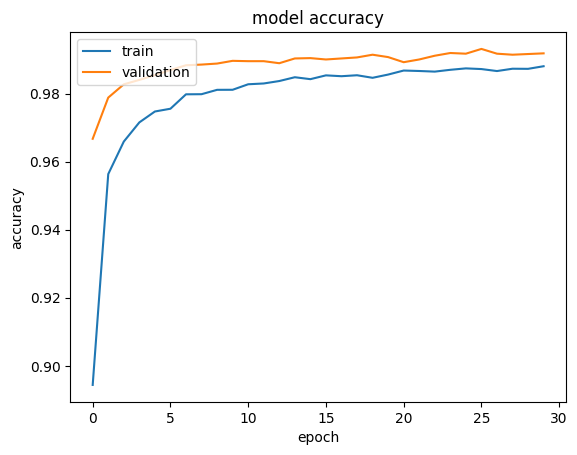

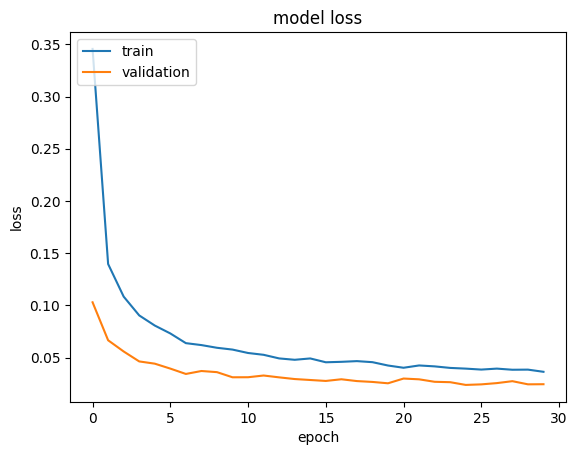

In [10]:
print(history.history.keys())
# graph for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# graph for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Archive
Here are listed some of the models I tried. Of course I tried and rated a lot more, but the following steps had the most significant changes in the development process of the model. Also a short comment shows the idea behind the next step. Every model was trained in ten epochs therefore the key figures are comparable.

In [ ]:
#1: Just a basic structure to start with. At the end there are 10 numbers, so 10 neurons at the end.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#1: loss: 0.1056 - accuracy: 0.9734 - validation accuracy: 0.9733999967575073

#2: Tryout if more neurons are helping the process.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#2: loss: 0.1099 - accuracy: 0.9762 - validation accuracy: 0.9761999845504761

#3: Accuracy was improved a little bit, but the loss not. Although I wanted to try with 28x28=784 in the first layer and then compaction.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(784, activation=tf.nn.relu),
    tf.keras.layers.Dense(392, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#3: loss: 0.1013 - accuracy: 0.9782 - validation accuracy: 0.9782000184059143

#4: This adjustments helped not that much. The next idea is to replace the first dense layer with a convolutional followed by a MaxPooling layer and flatten later.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#4: loss: 0.0586 - accuracy: 0.9853 - validation accuracy: 0.9853000044822693

#5: This looks like the way to go. As you can see the loss and accuracy are showing a huge performance improvement of the model. Next try is the activation function of the dense layer 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#5: loss: 0.0558 - accuracy: 0.9848 - validation accuracy: 0.9847999811172485

#6: The loss was slightly improved in exchange for a little bit of accuracy. The analyses of the epochs nevertheless showed that the values were reached more quickly, however, which is why the adjustment counts as an improvement.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#6: loss: 0.0441 - accuracy: 0.9855 - validation accuracy: 0.9854999780654907

#7: The first three layers have improved the model even more. Perhaps this constellation will bring another improvement as well.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#7: loss: 0.0345 - accuracy: 0.9885 - validation accuracy: 0.9884999990463257

#8: What just worked could possibly help again. 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#8: loss: 0.1048 - accuracy: 0.9694 - validation accuracy: 0.9693999886512756

#9: Unfortunately not. That was probably too much. Back to #7 and adjust the first layer so that the mesh is condensed piece by piece at the beginning.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#9: loss: 0.0318 - accuracy: 0.9897 - validation accuracy: 0.9897000193595886

#10: That was a success!! The "funneling" at the beginning has helped, perhaps the expansion of the "funnel" can increase the performance.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#10: loss: 0.1492 - accuracy: 0.9465 - validation accuracy: 0.9275638756478595

#11: Very bad idea!!! Maybe the "funnel" was just extended in the wrong direction.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#11: loss: 0.1047 - accuracy: 0.9385 - validation accuracy: 0.9395752574558456

#12: Nope. Bad again. #9 is still my best achitecture. Since the further "funneling" before the flattening layer didn't help any more, here's the attempt to continue this idea afterwards
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(64, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#12: loss: 0.0351 - accuracy: 0.9889 - validation accuracy: 0.9889000058174133

#13: Still #9 is the best one. At this point i tried a lot, add new layers and different layers and so on. Nothing I did improved my model why I wanted to try some things at the model.compile.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#13:loss: 0.1355 - accuracy: 0.9587 - validation accuracy: 0.9587000012397766



#As well I tried a lot more as the shown one but unfortunately without success. From all things I tried #9 is still the best.
#Unfortunately, I could not try more due to time constraints, which is why #9 is used as my final model at this point.

#final: Here is my final modell:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#final: loss: 0.0301 - accuracy: 0.9900 - validation accuracy: 0.9900000095367432
#final after 30 epochs: loss: 0.0244 - accuracy: 0.9918 - validation accuracy: 0.9918000102043152